# Homework 4 - Pawpularity

It's time to train your first model on ~cats~ real data. The dataset of cute pets is avaialble here -  [Pawpularity Contest - Predict the popularity of shelter pet photos](https://www.kaggle.com/c/petfinder-pawpularity-score/data)


Your task is to predict engagement with a pet's profile based on the photograph for that profile. You are also provided with hand-labelled metadata for each photo. The dataset for this competition therefore comprises both images and tabular data.

In this homework we'll only use tabular meta data. Our goal is to fit linear reggresion on binary features. Let's see if we can do it better than predicting a constant.
![PetFinder.my - Pawpularity Contest](https://www.petfinder.my/images/cuteness_meter-showcase.jpg)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

sns.set(rc={'figure.figsize':(14,9)})
%matplotlib inline

In [2]:
data = pd.read_csv("./data/pawpularity_train.csv")

In [3]:
data.sample(5)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
1657,2a453dc36321a8307b70417c95741b40,0,1,1,1,0,0,0,0,0,0,0,0,49
7894,cc832cdf684ee5e3bb6ed747c494de65,0,1,1,1,0,0,0,0,0,0,0,0,16
5693,934333e4225606d562bce5061d10dcb3,0,1,1,1,0,0,0,0,1,1,0,0,25
579,0f0cf101b75e64a5ffe4c0c22db5beac,0,1,1,1,0,0,0,0,0,0,0,0,3
5393,8b0b63cef18c5373e5a4a0f81fe3a326,0,1,1,1,0,0,0,0,0,1,1,0,84


Let's create train/test split. We keep 20% of data for testing model performance

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data.Pawpularity)
train.shape, test.shape

((7929, 14), (1983, 14))

In [ ]:
# Check that you have the same train/test split as others
assert(train.iloc[5].Pawpularity == 13)
assert(train.iloc[-5].Face == 1)
assert(test.iloc[5].Group == 1)
assert(test.iloc[-5].Pawpularity == 39)

### Baseline

Create a copy for test dataset:

In [ ]:
test = test.copy()

Set baseline based on mean/median/mode:

In [ ]:
test['baseline'] = train['Pawpularity'].mean() # try to use mean/median/mode as baseline

In [ ]:
mean_squared_error(test.Pawpularity, test.baseline, squared=False)

20.617506165697478

In [ ]:
test['baseline'] = train['Pawpularity'].median()
mean_squared_error(test.Pawpularity, test.baseline, squared=False)

21.2282578397936

In [ ]:
train['Pawpularity'].mode()

0    28
1    30
dtype: int64

In [ ]:
test['baseline'] = train['Pawpularity'].mode()[0]
mean_squared_error(test.Pawpularity, test.baseline, squared=False)

22.938911177100863

In [ ]:
test['baseline'] = train['Pawpularity'].mode()[1]
mean_squared_error(test.Pawpularity, test.baseline, squared=False)

22.13530573449703

### Regression

Let's try to train linear regression on binary features

In [ ]:
features = data.columns[1:-1]
features

Index(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group',
       'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],
      dtype='object')

In [ ]:
X_train = train[features].values
y_train = train['Pawpularity'].values
X_test = test[features].values

In [ ]:
model = LinearRegression() # Compare several regression models, select the best. Don't forget to tune hyper params

In [ ]:
# Train your model here:
# model.fit()
# test['pred'] = model.predict()

In [ ]:
model.fit(X_train, y_train)
test['pred'] = model.predict(X_test)

Calculate score:

In [ ]:
mean_squared_error(test.Pawpularity, test.pred, squared=False)

20.613211282893758

Check params:

In [ ]:
list(zip(features, model.coef_)) # model's weights

[('Subject Focus', -1.3184191941230026),
 ('Eyes', -1.9247962162298862),
 ('Face', 2.1074415988071937),
 ('Near', 0.01681275070249122),
 ('Action', -0.9241970093571154),
 ('Accessory', 1.2659010714807652),
 ('Group', 1.1052053508764026),
 ('Collage', 0.6555508044163019),
 ('Human', 0.21980501892114973),
 ('Occlusion', -0.2485332017579931),
 ('Info', -1.4531318086129992),
 ('Blur', -3.9578732160824983)]

In [ ]:
model.intercept_ # model's bias

37.75776263342286

Analyze errors: 

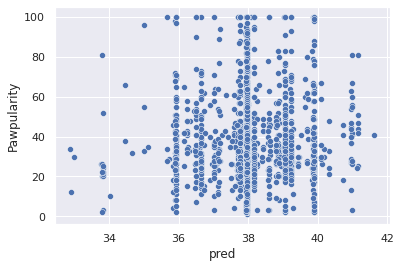

In [ ]:
## True value / pred value plot:
sns.scatterplot(x=test.pred, y=test.Pawpularity);

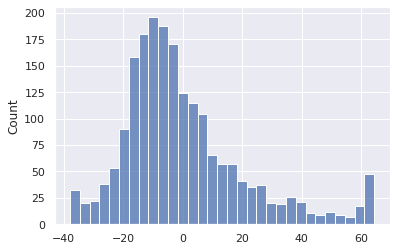

In [ ]:
## Errors distribution:
sns.histplot(test.Pawpularity - test.pred);

In [ ]:
def model_train(model):
    model.fit(X_train, y_train)
    test['pred'] = model.predict(X_test)
    return mean_squared_error(test.Pawpularity, test.pred, squared=False)

In [ ]:
linear_regression = [
    LinearRegression(),
    LinearRegression(fit_intercept=False),
]

for model in linear_regression:
    print(model)
    print(model_train(model), '\n')

LinearRegression()
20.613211282893758 

LinearRegression(fit_intercept=False)
22.2536750760782 



The best score for LinearRegression **20.613211282893758**, model=LinearRegression()

In [ ]:
lasso_regression = [
    Lasso(alpha=1, max_iter=1000, tol=1e-4, selection='cyclic'),
    Lasso(alpha=1, max_iter=200, tol=1e-4, selection='cyclic'),
    Lasso(alpha=1, max_iter=200, tol=1e-4, selection='random'),
    Lasso(alpha=0.1, max_iter=200, tol=1e-4, selection='cyclic'),
    Lasso(alpha=0.1, max_iter=200, tol=1e-4, selection='random'),
    Lasso(alpha=0.01, max_iter=200, tol=1e-4, selection='cyclic'),
    Lasso(alpha=0.01, max_iter=200, tol=1e-4, selection='random'),
    Lasso(alpha=0.001, max_iter=400, tol=1e-4, selection='cyclic'),
    Lasso(alpha=0.001, max_iter=400, tol=1e-4, selection='random'),
    Lasso(alpha=0.001, max_iter=400, tol=1e-6, selection='cyclic'),
    Lasso(alpha=0.001, max_iter=400, tol=1e-6, selection='random'),
]

for model in lasso_regression:
    print(model)
    print(model_train(model), '\n')

Lasso(alpha=1)
20.617506165697478 

Lasso(alpha=1, max_iter=200)
20.617506165697478 

Lasso(alpha=1, max_iter=200, selection='random')
20.617506165697478 

Lasso(alpha=0.1, max_iter=200)
20.620434481359684 

Lasso(alpha=0.1, max_iter=200, selection='random')
20.620424849145234 

Lasso(alpha=0.01, max_iter=200)
20.611307069542008 

Lasso(alpha=0.01, max_iter=200, selection='random')
20.611306446253657 

Lasso(alpha=0.001, max_iter=400)
20.61306369723982 

Lasso(alpha=0.001, max_iter=400, selection='random')
20.613062907279208 

Lasso(alpha=0.001, max_iter=400, tol=1e-06)
20.613062441967507 

Lasso(alpha=0.001, max_iter=400, selection='random', tol=1e-06)
20.61306249857786 



The best score for Lasso Regression **20.611307069542008**,  model=Lasso(alpha=0.01, max_iter=200) and Lasso(alpha=0.01, max_iter=200, selection='random') (value fluctuates around 
**20.61130..** 



In [ ]:
model = Lasso(alpha=0.01, max_iter=200)
print(model_train(model))

20.611307069542008


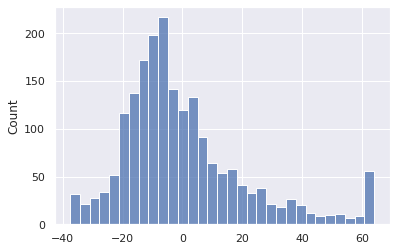

In [ ]:
sns.histplot(test['Pawpularity'] - test['pred']);

In [ ]:
print('intercept =', model.intercept_)
list(zip(features, model.coef_))

intercept = 37.820836018469


[('Subject Focus', -0.952452917862961),
 ('Eyes', -1.591877230604088),
 ('Face', 1.7442822368099904),
 ('Near', -0.0),
 ('Action', -0.0),
 ('Accessory', 1.0803270016461908),
 ('Group', 1.0039509073547388),
 ('Collage', 0.2919202015070734),
 ('Human', 0.025692153918600455),
 ('Occlusion', -0.0658810695407762),
 ('Info', -1.1142955712244536),
 ('Blur', -3.5613996556232346)]

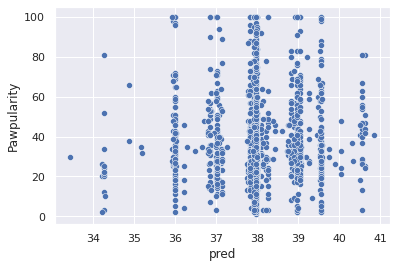

In [ ]:
sns.scatterplot(x=test.pred, y=test.Pawpularity);

In [ ]:
ridge_regression =[
    Ridge(alpha=1, max_iter=1000, tol=1e-3, solver="auto", random_state=24),
    Ridge(alpha=1, max_iter=500, tol=1e-3, solver="auto", random_state=24),
    Ridge(alpha=0.1, max_iter=500, tol=1e-3, solver="auto", random_state=24),
    Ridge(alpha=0.01, max_iter=500, tol=1e-3, solver="auto", random_state=24),
    Ridge(alpha=0.001, max_iter=700, tol=1e-6, solver="auto", random_state=24),
    Ridge(alpha=1, max_iter=500, tol=1e-3, solver='lsqr', random_state=24),
    Ridge(alpha=0.1, max_iter=500, tol=1e-3, solver='lsqr', random_state=24),
    Ridge(alpha=0.1, max_iter=500, tol=1e-3, solver='sparse_cg', random_state=24),
    Ridge(alpha=0.1, max_iter=500, tol=1e-3, solver='sag', random_state=24),
    Ridge(alpha=0.1, max_iter=500, tol=1e-3, solver='saga', random_state=24),
    Ridge(alpha=0.1, max_iter=500, tol=1e-3, solver='lbfgs', positive=True, random_state=24),
    Ridge(alpha=0.01, max_iter=1000, tol=1e-4, solver='lsqr', random_state=24),
    Ridge(alpha=0.01, max_iter=1000, tol=1e-4, solver='sparse_cg', random_state=24),
    Ridge(alpha=0.01, max_iter=1000, tol=1e-4, solver='sag', random_state=24),
    Ridge(alpha=0.01, max_iter=1000, tol=1e-4, solver='saga', random_state=24),
    Ridge(alpha=0.01, max_iter=1000, tol=1e-4, solver='lbfgs', positive=True, random_state=24),
]

for model in ridge_regression:
    print(model)
    print(model_train(model), '\n')

Ridge(alpha=1, max_iter=1000, random_state=24)
20.61317965675308 

Ridge(alpha=1, max_iter=500, random_state=24)
20.61317965675308 

Ridge(alpha=0.1, max_iter=500, random_state=24)
20.61320806041726 

Ridge(alpha=0.01, max_iter=500, random_state=24)
20.613210960040405 

Ridge(alpha=0.001, max_iter=700, random_state=24, tol=1e-06)
20.61321125060236 

Ridge(alpha=1, max_iter=500, random_state=24, solver='lsqr')
20.612452144706925 

Ridge(alpha=0.1, max_iter=500, random_state=24, solver='lsqr')
20.612464710605742 

Ridge(alpha=0.1, max_iter=500, random_state=24, solver='sparse_cg')
20.613198774465157 

Ridge(alpha=0.1, max_iter=500, random_state=24, solver='sag')
20.613211646554443 

Ridge(alpha=0.1, max_iter=500, random_state=24, solver='saga')
20.613255871608153 

Ridge(alpha=0.1, max_iter=500, positive=True, random_state=24, solver='lbfgs')
20.616140531275594 

Ridge(alpha=0.01, max_iter=1000, random_state=24, solver='lsqr', tol=0.0001)
20.613295389424476 

Ridge(alpha=0.01, max_iter=1

The best score for Ridge Regression **20.612452144706925**, `Ridge(alpha=1, max_iter=500, random_state=24, solver='lsqr')`


In [ ]:
model = Ridge(alpha=1, max_iter=500, tol=1e-3, solver='lsqr', random_state=24)
print(model_train(model))

20.612452144706925


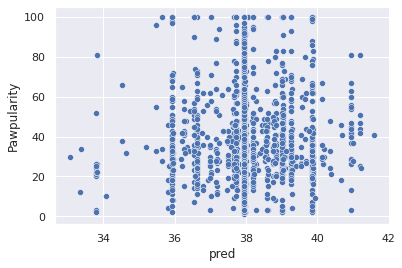

In [ ]:
sns.scatterplot(x=test.pred, y=test.Pawpularity);

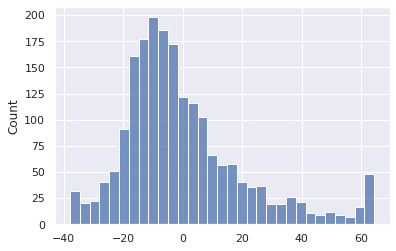

In [ ]:
sns.histplot(test['Pawpularity'] - test['pred']);

In [ ]:
print('intercept =', model.intercept_)
list(zip(features, model.coef_))

intercept = 37.76117920227314


[('Subject Focus', -1.3049157432656429),
 ('Eyes', -1.9142265603959263),
 ('Face', 2.1195406833847414),
 ('Near', -0.02632761411945771),
 ('Action', -0.44703556593188815),
 ('Accessory', 1.33174262724429),
 ('Group', 1.0783591886340997),
 ('Collage', 0.6396248926506978),
 ('Human', 0.2694941791859811),
 ('Occlusion', -0.2694857739992656),
 ('Info', -1.4085024084637938),
 ('Blur', -3.927769747253107)]

**Compare several regression models (L1, L2 regularization), select the best. Don't forget to tune hyperparams**

Print your best score and what type of regression you used to achieve it:

The best score of mean_squared_error = **20.6113** for model **Lasso** (L1 regularization with parameters): `alpha=0.01, max_iter=200, selection='cyclic'/'random'`

### Polinomial Regression
Do polynomial features improve the score?

[make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) helps to combine several steps into one model

In [ ]:
#model = make_pipeline(
#    ...
#)

In [ ]:
# Hint: to check weight use:
# list(zip(t.get_feature_names(input_features=features), model.steps[1][1].coef_)) # model's weights

In [ ]:
for degree in [2, 3]:
    model = make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression()
    )
    print('degree=', degree, model_train(model))

degree= 2 20.66503949105589
degree= 3 257052864212.44846


In [ ]:
for degree in [2, 3, 4, 5]:
    model = make_pipeline(
        PolynomialFeatures(degree),
        Lasso(alpha=0.01, max_iter=200)
    )
    print('degree=', degree, model_train(model))

degree= 2 20.577283423200953
degree= 3 20.580339788949253
degree= 4 20.585001970673545
degree= 5 20.585026727746794


In [ ]:
for degree in [2, 3, 4, 5]:
    model = make_pipeline(
        PolynomialFeatures(degree),
        Lasso(alpha=0.01, max_iter=400, selection='random')
    )
    print('degree=', degree, model_train(model))

degree= 2 20.577322779693656
degree= 3 20.580401414477123
degree= 4 20.584984539527568
degree= 5 20.585105362643805


In [ ]:
for degree in [2, 3, 4, 5]:
    model = make_pipeline(
        PolynomialFeatures(degree),
        Ridge(alpha=1, max_iter=500, tol=1e-3, solver='lsqr', random_state=24)
    )
    print('degree=', degree, model_train(model))

degree= 2 20.590203493633705
degree= 3 20.656576243959744
degree= 4 20.674939128039806
degree= 5 20.700666866603036


In [ ]:
model = make_pipeline(
    PolynomialFeatures(2),
    Lasso(alpha=0.01, max_iter=400, selection='random')
)
model_train(model)

20.577335005149784

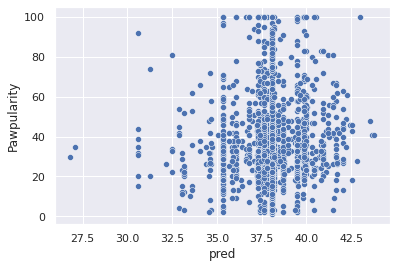

In [ ]:
sns.scatterplot(x=test['pred'], y=test['Pawpularity']);

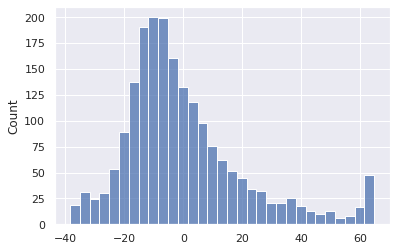

In [ ]:
sns.histplot(test['Pawpularity'] - test['pred']);

In [ ]:
print('intercept =', model.steps[1][1].intercept_)

list(zip(model.steps[0][1].get_feature_names_out(input_features=features), model.steps[1][1].coef_))


intercept = 35.89861170200175


[('1', 0.0),
 ('Subject Focus', -0.0),
 ('Eyes', 0.0),
 ('Face', 1.1389024970434511),
 ('Near', 0.6679610739245836),
 ('Action', -0.0),
 ('Accessory', -0.0),
 ('Group', 2.340043679108776),
 ('Collage', -0.0),
 ('Human', 0.0),
 ('Occlusion', -0.1954129624481429),
 ('Info', -2.9686107310464385),
 ('Blur', -0.3265161680983553),
 ('Subject Focus^2', -0.0),
 ('Subject Focus Eyes', -0.0),
 ('Subject Focus Face', -0.27921310781760994),
 ('Subject Focus Near', -0.0),
 ('Subject Focus Action', -0.0),
 ('Subject Focus Accessory', -8.944503127107327),
 ('Subject Focus Group', -0.0),
 ('Subject Focus Collage', 0.0),
 ('Subject Focus Human', 0.0),
 ('Subject Focus Occlusion', 0.0),
 ('Subject Focus Info', -0.0),
 ('Subject Focus Blur', 0.0),
 ('Eyes^2', 0.0),
 ('Eyes Face', 0.6118857593345349),
 ('Eyes Near', -1.978183014179515),
 ('Eyes Action', -0.0),
 ('Eyes Accessory', 0.0),
 ('Eyes Group', -2.7013117324896307),
 ('Eyes Collage', -0.0),
 ('Eyes Human', -0.08358125819207422),
 ('Eyes Occlusion',

Print your best score with pollinomial reggresion:

The best score with polynomial regresion = **20.577283423200953**, for degree=2 and `Lasso(alpha=0.01, max_iter=200)`

### Feature selection

Let's use Lasso for feature selection. Sklearn's [SelectFromModel](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel) will help

In [ ]:
X_train.shape

(7929, 12)

In [ ]:
model = SelectFromModel(Lasso(alpha=1, random_state=24))
model.fit(X_train, y_train)
X_new = model.transform(X_train)
X_new.shape


/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn(


(7929, 0)

In [ ]:
model = SelectFromModel(Lasso(alpha=0.1, random_state=24))
model.fit(X_train, y_train)
X_new = model.transform(X_train)
X_new.shape

(7929, 2)

In [ ]:
model = SelectFromModel(Lasso(alpha=0.01, random_state=24))
model.fit(X_train, y_train)
X_new = model.transform(X_train)
X_new.shape

(7929, 10)

In [ ]:
model = SelectFromModel(Lasso(alpha=0.001, random_state=24))
model.fit(X_train, y_train)
X_new = model.transform(X_train)
X_new.shape

(7929, 12)

In [ ]:
for regression_model in linear_regression:
    model = make_pipeline(
        SelectFromModel(Lasso(alpha=0.1, random_state=24)),
        regression_model
    )
    print(regression_model)
    print(model_train(model))
    print(list(zip(features, model.steps[1][1].coef_)), '\n')

LinearRegression()
20.630094201277224
[('Subject Focus', 1.024885475675135), ('Eyes', -2.5454593701313235)] 

LinearRegression(fit_intercept=False)
39.99508016943042
[('Subject Focus', 36.546406112698925), ('Eyes', 30.433191222592615)] 



In [ ]:
for regression_model in linear_regression:
    model = make_pipeline(
        SelectFromModel(Lasso(alpha=0.01, random_state=24)),
        regression_model
    )
    print(regression_model)
    print(model_train(model))
    print(list(zip(features, model.steps[1][1].coef_)), '\n')

LinearRegression()
20.61231209214026
[('Subject Focus', -1.3259823987930472), ('Eyes', -1.9175491541794585), ('Face', 2.1066832145366763), ('Near', 1.254083529835692), ('Action', 1.1025676018743562), ('Accessory', 0.6450699328547651), ('Group', 0.2216861228048349), ('Collage', -0.24799279060167567), ('Human', -1.4458201481207231), ('Occlusion', -3.952251926005319)] 

LinearRegression(fit_intercept=False)
23.214998493882153
[('Subject Focus', 1.3810431951863251), ('Eyes', 2.9628931020280334), ('Face', 32.99033454970427), ('Near', 4.329699858588109), ('Action', 8.847113727714271), ('Accessory', -1.6558527618404737), ('Group', 3.19227084138819), ('Collage', 1.5974106065660738), ('Human', 0.7601708256174765), ('Occlusion', 6.497445148277441)] 



In [ ]:
for regression_model in lasso_regression:
    model = make_pipeline(
        SelectFromModel(Lasso(alpha=0.1, random_state=24)),
        regression_model
    )
    print(regression_model)
    print(model_train(model))
    print(list(zip(features, model.steps[1][1].coef_)), '\n')

Lasso(alpha=1)
20.617506165697478
[('Subject Focus', 0.0), ('Eyes', -0.0)] 

Lasso(alpha=1, max_iter=200)
20.617506165697478
[('Subject Focus', 0.0), ('Eyes', -0.0)] 

Lasso(alpha=1, max_iter=200, selection='random')
20.617506165697478
[('Subject Focus', 0.0), ('Eyes', -0.0)] 

Lasso(alpha=0.1, max_iter=200)
20.620434481359684
[('Subject Focus', 0.12784063790222486), ('Eyes', -1.0012656735583385)] 

Lasso(alpha=0.1, max_iter=200, selection='random')
20.620424849145234
[('Subject Focus', 0.12782485043648703), ('Eyes', -0.9993960114987074)] 

Lasso(alpha=0.01, max_iter=200)
20.628588184443824
[('Subject Focus', 0.9351809916028224), ('Eyes', -2.3910400004697143)] 

Lasso(alpha=0.01, max_iter=200, selection='random')
20.62858818409159
[('Subject Focus', 0.9351809916028224), ('Eyes', -2.391039964008825)] 

Lasso(alpha=0.001, max_iter=400)
20.629938202340853
[('Subject Focus', 1.0159150269728796), ('Eyes', -2.5300174331608467)] 

Lasso(alpha=0.001, max_iter=400, selection='random')
20.629938

In [ ]:
for regression_model in lasso_regression:
    model = make_pipeline(
        SelectFromModel(Lasso(alpha=0.01, random_state=24)),
        regression_model
    )
    print(regression_model)
    print(model_train(model))
    print(list(zip(features, model.steps[1][1].coef_)), '\n')

Lasso(alpha=1)
20.617506165697478
[('Subject Focus', -0.0), ('Eyes', 0.0), ('Face', 0.0), ('Near', 0.0), ('Action', 0.0), ('Accessory', 0.0), ('Group', -0.0), ('Collage', -0.0), ('Human', -0.0), ('Occlusion', -0.0)] 

Lasso(alpha=1, max_iter=200)
20.617506165697478
[('Subject Focus', -0.0), ('Eyes', 0.0), ('Face', 0.0), ('Near', 0.0), ('Action', 0.0), ('Accessory', 0.0), ('Group', -0.0), ('Collage', -0.0), ('Human', -0.0), ('Occlusion', -0.0)] 

Lasso(alpha=1, max_iter=200, selection='random')
20.617506165697478
[('Subject Focus', 0.0), ('Eyes', 0.0), ('Face', 0.0), ('Near', 0.0), ('Action', 0.0), ('Accessory', 0.0), ('Group', 0.0), ('Collage', 0.0), ('Human', -0.0), ('Occlusion', -0.0)] 

Lasso(alpha=0.1, max_iter=200)
20.620434481359684
[('Subject Focus', -0.0), ('Eyes', -0.0), ('Face', 0.0), ('Near', 0.0), ('Action', 0.12784063790222486), ('Accessory', 0.0), ('Group', -0.0), ('Collage', -0.0), ('Human', -0.0), ('Occlusion', -1.0012656735583385)] 

Lasso(alpha=0.1, max_iter=200, sele

The best scores for `SelectFromModel(Lasso(alpha=0.01, random_state=24)`:
1.   `Lasso(alpha=0.01, max_iter=200)`, mse=**20.61130707830482**
2.   `Lasso(alpha=0.01, max_iter=200, selection='random')`, mse=**20.611306433148272**



In [ ]:
for regression_model in ridge_regression:
    model = make_pipeline(
        SelectFromModel(Lasso(alpha=0.1, random_state=24)),
        regression_model
    )
    print(regression_model)
    print(model_train(model))
    print(list(zip(features, model.steps[1][1].coef_)), '\n')

Ridge(alpha=1, max_iter=1000, random_state=24)
20.63004427561304
[('Subject Focus', 1.0237025774960247), ('Eyes', -2.540536344081832)] 

Ridge(alpha=1, max_iter=500, random_state=24)
20.63004427561304
[('Subject Focus', 1.0237025774960247), ('Eyes', -2.540536344081832)] 

Ridge(alpha=0.1, max_iter=500, random_state=24)
20.630089196174552
[('Subject Focus', 1.0247670599392857), ('Eyes', -2.5449662102862995)] 

Ridge(alpha=0.01, max_iter=500, random_state=24)
20.630093700641286
[('Subject Focus', 1.0248736328408408), ('Eyes', -2.5454100455580213)] 

Ridge(alpha=0.001, max_iter=700, random_state=24, tol=1e-06)
20.630094151212372
[('Subject Focus', 1.0248842913790952), ('Eyes', -2.545454437588099)] 

Ridge(alpha=1, max_iter=500, random_state=24, solver='lsqr')
20.63004427561304
[('Subject Focus', 1.0237025774960298), ('Eyes', -2.5405363440818145)] 

Ridge(alpha=0.1, max_iter=500, random_state=24, solver='lsqr')
20.630089196174552
[('Subject Focus', 1.0247670599392908), ('Eyes', -2.54496621

In [ ]:
for regression_model in ridge_regression:
    model = make_pipeline(
        SelectFromModel(Lasso(alpha=0.01, random_state=24)),
        regression_model
    )
    print(regression_model)
    print(model_train(model))
    print(list(zip(features, model.steps[1][1].coef_)), '\n')

Ridge(alpha=1, max_iter=1000, random_state=24)
20.612291038425173
[('Subject Focus', -1.3196816660947979), ('Eyes', -1.9069961764965462), ('Face', 2.0957542828318942), ('Near', 1.2513669722144336), ('Action', 1.1013131475328657), ('Accessory', 0.6411544096413422), ('Group', 0.22126211806656298), ('Collage', -0.247746078706967), ('Human', -1.4405397551247157), ('Occlusion', -3.9367582117118043)] 

Ridge(alpha=1, max_iter=500, random_state=24)
20.612291038425173
[('Subject Focus', -1.3196816660947979), ('Eyes', -1.9069961764965462), ('Face', 2.0957542828318942), ('Near', 1.2513669722144336), ('Action', 1.1013131475328657), ('Accessory', 0.6411544096413422), ('Group', 0.22126211806656298), ('Collage', -0.247746078706967), ('Human', -1.4405397551247157), ('Occlusion', -3.9367582117118043)] 

Ridge(alpha=0.1, max_iter=500, random_state=24)
20.61230995162136
[('Subject Focus', -1.3253496347806246), ('Eyes', -1.9164893664222022), ('Face', 2.1055855540439996), ('Near', 1.2538113457268583), ('A

The best scores for SelectFromModel(Lasso(alpha=0.01, random_state=24):
1.   `Ridge(alpha=1, max_iter=500, random_state=24, solver='lsqr')`, mse=**20.611823167025367**
2.   `Ridge(alpha=0.1, max_iter=500, random_state=24, solver='lsqr')`, mse=**20.61183730100705**

In [ ]:
for degree in [2, 3]:
    for regres_model in linear_regression:
      model = make_pipeline(
          PolynomialFeatures(degree),
          SelectFromModel(Lasso(alpha=0.1, random_state=24)),
          regres_model
      )
      print(f"{regres_model}, degree={degree}")
      print(model_train(model))
      print(list(zip(features, model.steps[2][1].coef_)), '\n')

LinearRegression(), degree=2
20.633834166336605
[('Subject Focus', -1901368941924.7458), ('Eyes', -33831096644499.812), ('Face', 1901368941925.7578), ('Near', 33831096644496.918)] 

LinearRegression(fit_intercept=False), degree=2
39.99851237198453
[('Subject Focus', -670924898342388.1), ('Eyes', 6558858015361.25), ('Face', 670924898342423.6), ('Near', -6558858015330.891)] 

LinearRegression(), degree=3
20.642035123208963
[('Subject Focus', -3022633739403.552), ('Eyes', -157453472973135.4), ('Face', 3022633739404.4688), ('Near', 78726736486566.23), ('Action', -1.083984375), ('Accessory', 78726736486566.19)] 

LinearRegression(fit_intercept=False), degree=3
37.97750350982355
[('Subject Focus', 1719060467688061.0), ('Eyes', -1497068554619027.0), ('Face', -1719060467688028.0), ('Near', 748534277309553.2), ('Action', 35.34375), ('Accessory', 748534277309502.0)] 



In [ ]:
for degree in [2, 3]:
    for regres_model in linear_regression:
      model = make_pipeline(
          PolynomialFeatures(degree),
          SelectFromModel(Lasso(alpha=0.01, random_state=24)),
          regres_model
      )
      print(f"{regres_model}, degree={degree}")
      print(model_train(model))
      print(list(zip(features, model.steps[2][1].coef_)), '\n')

LinearRegression(), degree=2
20.6301380773912
[('Subject Focus', 1245600804513.0), ('Eyes', -17476376191694.03), ('Face', -191952017549500.8), ('Near', -195427033568.14386), ('Action', 248275892065144.06), ('Accessory', -409090293419221.4), ('Group', -218428333901068.75), ('Collage', -0.257759404703413), ('Human', -13.969705348491322), ('Occlusion', 2.302922703060661), ('Info', -3.910510998645059), ('Blur', -3.0421484422681906)] 

LinearRegression(fit_intercept=False), degree=2
21.05521531655032
[('Subject Focus', -61706279195453.59), ('Eyes', -8306933541085.828), ('Face', -226278496882800.88), ('Near', 33420482580266.8), ('Action', 175453041479625.7), ('Accessory', 82794496559177.31), ('Group', 173578194428645.6), ('Collage', -0.5649961807751573), ('Human', -13.768979942068672), ('Occlusion', 22.4722548636132), ('Info', -26.677193215183216), ('Blur', -11.785998607922313)] 

LinearRegression(), degree=3
20.661742914543694
[('Subject Focus', -1838702259245.561), ('Eyes', 95840481624876.

In [ ]:
for degree in [2, 3]:
    for regres_model in lasso_regression:
      model = make_pipeline(
          PolynomialFeatures(degree),
          SelectFromModel(Lasso(alpha=0.1, random_state=24)),
          regres_model
      )
      print(f"{regres_model}, degree={degree}")
      print(model_train(model))
      print(list(zip(features, model.steps[2][1].coef_)), '\n')

Lasso(alpha=1), degree=2
20.617506165697478
[('Subject Focus', 0.0), ('Eyes', -0.0), ('Face', 0.0), ('Near', -0.0)] 

Lasso(alpha=1, max_iter=200), degree=2
20.617506165697478
[('Subject Focus', 0.0), ('Eyes', -0.0), ('Face', 0.0), ('Near', -0.0)] 

Lasso(alpha=1, max_iter=200, selection='random'), degree=2
20.617506165697478
[('Subject Focus', 0.0), ('Eyes', -0.0), ('Face', 0.0), ('Near', 0.0)] 

Lasso(alpha=0.1, max_iter=200), degree=2
20.620434481359066
[('Subject Focus', 0.11938690457724631), ('Eyes', -1.001142038189203), ('Face', 0.008453733453907139), ('Near', -0.00012363537102907354)] 

Lasso(alpha=0.1, max_iter=200, selection='random'), degree=2
20.620434481280352
[('Subject Focus', 0.12784063790222283), ('Eyes', -1.0011420229209347), ('Face', 3.2954907498823845e-15), ('Near', -0.00012363536914267742)] 

Lasso(alpha=0.01, max_iter=200), degree=2
20.62858818444371
[('Subject Focus', 0.9149933280614343), ('Eyes', -2.390744757038398), ('Face', 0.020187663849264535), ('Near', -0.00

In [ ]:
for degree in [2, 3]:
    for regres_model in lasso_regression:
      model = make_pipeline(
          PolynomialFeatures(degree),
          SelectFromModel(Lasso(alpha=0.01, random_state=24)),
          regres_model
      )
      print(f"{regres_model}, degree={degree}")
      print(model_train(model))
      print(list(zip(features, model.steps[2][1].coef_)), '\n')

Lasso(alpha=1), degree=2
20.617506165697478
[('Subject Focus', 0.0), ('Eyes', -0.0), ('Face', 0.0), ('Near', -0.0), ('Action', -0.0), ('Accessory', -0.0), ('Group', -0.0), ('Collage', -0.0), ('Human', -0.0), ('Occlusion', 0.0), ('Info', -0.0), ('Blur', -0.0)] 

Lasso(alpha=1, max_iter=200), degree=2
20.617506165697478
[('Subject Focus', 0.0), ('Eyes', -0.0), ('Face', 0.0), ('Near', -0.0), ('Action', -0.0), ('Accessory', -0.0), ('Group', -0.0), ('Collage', -0.0), ('Human', -0.0), ('Occlusion', 0.0), ('Info', -0.0), ('Blur', -0.0)] 

Lasso(alpha=1, max_iter=200, selection='random'), degree=2
20.617506165697478
[('Subject Focus', 0.0), ('Eyes', 0.0), ('Face', 0.0), ('Near', -0.0), ('Action', -0.0), ('Accessory', -0.0), ('Group', -0.0), ('Collage', -0.0), ('Human', -0.0), ('Occlusion', 0.0), ('Info', -0.0), ('Blur', 0.0)] 

Lasso(alpha=0.1, max_iter=200), degree=2
20.620434481359066
[('Subject Focus', 0.0), ('Eyes', -0.0), ('Face', 0.11938690457724631), ('Near', -0.0), ('Action', -0.0), ('

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.389e+03, tolerance: 3.360e+02
  model = cd_fast.enet_coordinate_descent(


20.639420345890763
[('Subject Focus', 0.6697833018947275), ('Eyes', 0.9850414071339827), ('Face', 1.773316458375645), ('Near', 0.5493004874007038), ('Action', -1.2586171916910336), ('Accessory', -1.318096111891224), ('Group', -0.04828091793008835), ('Collage', -0.3022029746243459), ('Human', -0.6182632981643491), ('Occlusion', -0.16129646872967227), ('Info', 0.6758885792933214), ('Blur', -0.9524358520960964)] 

Lasso(alpha=0.001, max_iter=400, tol=1e-06), degree=3


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.680e+01, tolerance: 3.360e+00
  model = cd_fast.enet_coordinate_descent(


20.63954035501115
[('Subject Focus', 0.0781282528413055), ('Eyes', 0.002434608426683438), ('Face', 0.9607243980627439), ('Near', 1.6259500809395129), ('Action', -1.203845449517582), ('Accessory', -2.3867341683534344), ('Group', -0.2755749513101616), ('Collage', -13.544923298681741), ('Human', -1.1289042843455486), ('Occlusion', -0.3295283833607816), ('Info', 1.4828639311939675), ('Blur', -4.689987711493781)] 

Lasso(alpha=0.001, max_iter=400, selection='random', tol=1e-06), degree=3
20.63946732397466
[('Subject Focus', 1.6734620630296704), ('Eyes', 0.9453017643672005), ('Face', 1.8068889571101452), ('Near', 0.4518807487383466), ('Action', -1.6767094741435344), ('Accessory', -2.5562552591996552), ('Group', -0.05492972703624049), ('Collage', -12.804452067499177), ('Human', -0.5231697382197932), ('Occlusion', -0.006999507308226184), ('Info', 0.35687018892138983), ('Blur', -2.5429916461254747)] 



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+02, tolerance: 3.360e+00
  model = cd_fast.enet_coordinate_descent(


The best scores for SelectFromModel(Lasso(alpha=0.01, random_state=24)) with PolynomialFeatures(degree):
1.   `Lasso(alpha=0.01, max_iter=200)`, degree=2, mse=**20.577284173547092**
2.   `Lasso(alpha=0.01, max_iter=200, selection='random')`, degree=2, mse=**20.57734425387893**

In [ ]:
for degree in [2, 3]:
    for regres_model in ridge_regression:
      model = make_pipeline(
          PolynomialFeatures(degree),
          SelectFromModel(Lasso(alpha=0.1, random_state=24)),
          regres_model
      )
      print(f"{regres_model}, degree={degree}")
      print(model_train(model))
      print(list(zip(features, model.steps[2][1].coef_)), '\n')

Ridge(alpha=1, max_iter=1000, random_state=24), degree=2
20.63006920365678
[('Subject Focus', 0.5121468384924674), ('Eyes', -1.271497738862089), ('Face', 0.5121468384924895), ('Near', -1.2714977388620001)] 

Ridge(alpha=1, max_iter=500, random_state=24), degree=2
20.63006920365678
[('Subject Focus', 0.5121468384924674), ('Eyes', -1.271497738862089), ('Face', 0.5121468384924895), ('Near', -1.2714977388620001)] 

Ridge(alpha=0.1, max_iter=500, random_state=24), degree=2
20.630091698376837
[('Subject Focus', 0.5124131321529565), ('Eyes', -1.2726063831768106), ('Face', 0.5124131321524577), ('Near', -1.2726063831760384)] 

Ridge(alpha=0.01, max_iter=500, random_state=24), degree=2
20.630093950955764
[('Subject Focus', 0.5124397771065403), ('Eyes', -1.2727173538198697), ('Face', 0.512439777116422), ('Near', -1.2727173537861802)] 

Ridge(alpha=0.001, max_iter=700, random_state=24, tol=1e-06), degree=2
20.630094176244764
[('Subject Focus', 0.5124424417493498), ('Eyes', -1.2727284519559168), ('

In [ ]:
for degree in [2, 3]:
    for regres_model in ridge_regression:
      model = make_pipeline(
          PolynomialFeatures(degree),
          SelectFromModel(Lasso(alpha=0.01, random_state=24)),
          regres_model
      )
      print(f"{regres_model}, degree={degree}")
      print(model_train(model))
      print(list(zip(features, model.steps[2][1].coef_)), '\n')

Ridge(alpha=1, max_iter=1000, random_state=24), degree=2
20.57967518292821
[('Subject Focus', 1.1770776816151185), ('Eyes', 1.351250244879066), ('Face', 3.4060601775006365), ('Near', 0.595454578659308), ('Action', -1.6504360378085066), ('Accessory', -2.8442876856958113), ('Group', -1.4093584536014803), ('Collage', -0.3721715271234387), ('Human', -13.045589139255464), ('Occlusion', 2.1226697539860515), ('Info', -3.678496926879388), ('Blur', -3.027585610804804)] 

Ridge(alpha=1, max_iter=500, random_state=24), degree=2
20.57967518292821
[('Subject Focus', 1.1770776816151185), ('Eyes', 1.351250244879066), ('Face', 3.4060601775006365), ('Near', 0.595454578659308), ('Action', -1.6504360378085066), ('Accessory', -2.8442876856958113), ('Group', -1.4093584536014803), ('Collage', -0.3721715271234387), ('Human', -13.045589139255464), ('Occlusion', 2.1226697539860515), ('Info', -3.678496926879388), ('Blur', -3.027585610804804)] 

Ridge(alpha=0.1, max_iter=500, random_state=24), degree=2
20.582436

The best scores for `SelectFromModel(Lasso(alpha=0.01, random_state=24))` with `PolynomialFeatures(degree)`:
`Ridge(alpha=1, max_iter=500, random_state=24, solver='lsqr')`, degree=2, mse=**20.570442129489617**

In [ ]:
model = make_pipeline(
    PolynomialFeatures(2),
    SelectFromModel(Lasso(alpha=0.01, random_state=24)),
    Ridge(alpha=1, max_iter=500, random_state=24,solver='lsqr')
)
model_train(model)

20.570442129489617

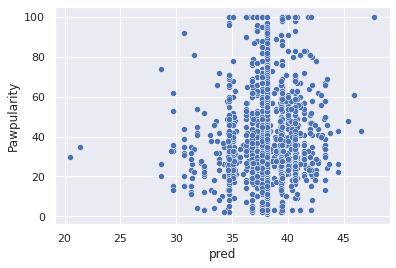

In [ ]:
sns.scatterplot(x=test['pred'], y=test['Pawpularity']);

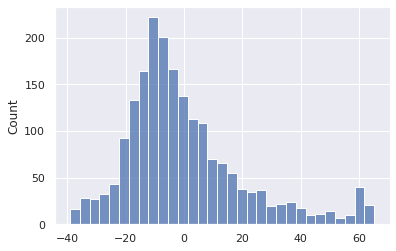

In [ ]:
sns.histplot(test['Pawpularity'] - test['pred']);

In [ ]:
model.steps[0][1].get_feature_names_out() 

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5',
       'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x1^2',
       'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8',
       'x1 x9', 'x1 x10', 'x1 x11', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5',
       'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x3^2',
       'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10',
       'x3 x11', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9',
       'x4 x10', 'x4 x11', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9',
       'x5 x10', 'x5 x11', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10',
       'x6 x11', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x8^2',
       'x8 x9', 'x8 x10', 'x8 x11', 'x9^2', 'x9 x10', 'x9 x11', 'x10^2',
       'x10 x11', 'x11^2'], dtype=object)

In [ ]:
model.steps[0][1].get_feature_names_out(input_features=features)

array(['1', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action',
       'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info',
       'Blur', 'Subject Focus^2', 'Subject Focus Eyes',
       'Subject Focus Face', 'Subject Focus Near', 'Subject Focus Action',
       'Subject Focus Accessory', 'Subject Focus Group',
       'Subject Focus Collage', 'Subject Focus Human',
       'Subject Focus Occlusion', 'Subject Focus Info',
       'Subject Focus Blur', 'Eyes^2', 'Eyes Face', 'Eyes Near',
       'Eyes Action', 'Eyes Accessory', 'Eyes Group', 'Eyes Collage',
       'Eyes Human', 'Eyes Occlusion', 'Eyes Info', 'Eyes Blur', 'Face^2',
       'Face Near', 'Face Action', 'Face Accessory', 'Face Group',
       'Face Collage', 'Face Human', 'Face Occlusion', 'Face Info',
       'Face Blur', 'Near^2', 'Near Action', 'Near Accessory',
       'Near Group', 'Near Collage', 'Near Human', 'Near Occlusion',
       'Near Info', 'Near Blur', 'Action^2', 'Action Accessory',
       'Action Group', 'Ac

In [ ]:
model.steps[1][1].get_feature_names_out()

array(['x3', 'x4', 'x7', 'x9', 'x10', 'x11', 'x12', 'x15', 'x18', 'x26',
       'x27', 'x30', 'x32', 'x33', 'x34', 'x36', 'x39', 'x40', 'x41',
       'x43', 'x44', 'x46', 'x49', 'x52', 'x53', 'x54', 'x56', 'x65',
       'x67', 'x68', 'x70', 'x73', 'x74', 'x75', 'x80', 'x81', 'x82',
       'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x90'], dtype=object)

In [ ]:
print('intercept = ', model.steps[2][1].intercept_);
list(zip(model.steps[1][1].get_feature_names_out(
                      input_features=model.steps[0][1].get_feature_names_out(input_features=features)
                      ), 
         model.steps[2][1].coef_))

intercept =  34.65410585299878


[('Face', 1.103835020602557),
 ('Near', 1.304865191725392),
 ('Group', 3.4036603683531084),
 ('Human', 0.6808158224455512),
 ('Occlusion', -1.6372867423865909),
 ('Info', -2.9888506457605857),
 ('Blur', -1.5162055861916761),
 ('Subject Focus Face', -0.4319306327490113),
 ('Subject Focus Accessory', -9.50263145283429),
 ('Eyes Face', 2.5348818193910265),
 ('Eyes Near', -3.890846557699319),
 ('Eyes Group', -2.94444676948844),
 ('Eyes Human', -1.3438761531595913),
 ('Eyes Occlusion', -2.9788032674051803),
 ('Eyes Info', -0.7528767728671779),
 ('Face^2', 1.103835020602557),
 ('Face Accessory', 2.4945360854423457),
 ('Face Group', -3.263971592395421),
 ('Face Collage', 2.681657290681218),
 ('Face Occlusion', 4.1565299791162245),
 ('Face Info', -4.021654542392417),
 ('Near^2', 1.3048651917254601),
 ('Near Group', -1.9181825980029086),
 ('Near Occlusion', -0.8951856163995334),
 ('Near Info', 8.913785771026543),
 ('Near Blur', -1.7191539629386297),
 ('Action Accessory', -5.898763940341189),
 (

Print your best score with feature selection:

The best score **20.5704** for using:
*   `PolinomialFeatures(degree=2)`,
*   `SelectFromModel(Lasso(alpha=0.01, random_state=24))`,
*   `Ridge(alpha=1, max_iter=500, random_state=24,solver='lsqr')`

The second best score **20.5773**:
*   `PolinomialFeatures(degree=2)`,
*   `SelectFromModel(Lasso(alpha=0.01, random_state=24))`,
*   `Lasso(alpha=0.01, max_iter=200, selection='cyclic'/'random')`

and
*   `PolinomialFeatures(degree=2)`,
*   `Lasso(alpha=0.01, max_iter=200)`